In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
df = pd.read_csv('data/customer.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185



1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

# Step 1: tentukan jumlah cluster

In [3]:
# kombinasi dari k-modes dan k means
# K-modes & K-means = K-prototype

In [5]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

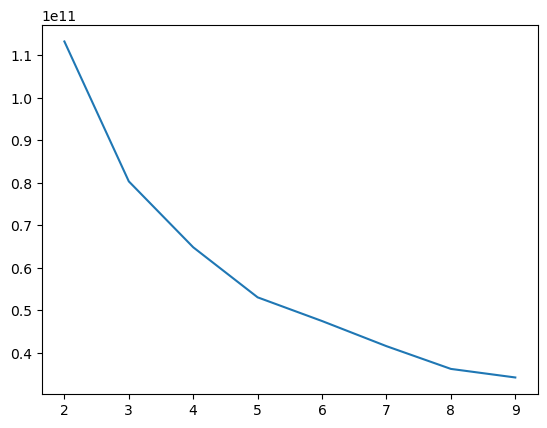

In [6]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit_predict(df, categorical=[0, 1])
    score.append(model.cost_)
plt.plot(range(2, 10), score)

# Training

In [7]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [8]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analyze Cluster

In [10]:
num, cat = model.cluster_centroids_

In [15]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,8249.996960,3800.966565,5248.556231,2571.677812,1755.112462,1137.018237
1,2,3,8027.411765,18375.921569,27342.549020,2014.313725,12314.607843,2233.254902
2,1,3,35941.400000,6044.450000,6288.616667,6713.966667,1039.666667,3049.466667


3 data diatas adalah DPR nya

mesin hanya mencari pola data yang berkumpul, manusia yang menganalisa 


cluster 0: orang hemat<br>
cluster 1: typical orang yang belanja milk, grocery dan detergents<br>
cluster 2: customer yang suka fresh food<br>

In [17]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

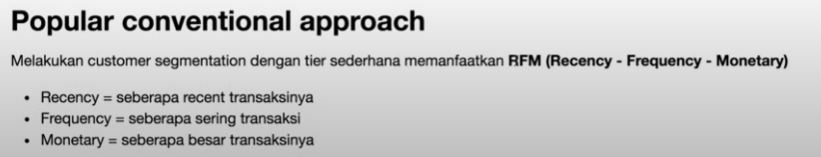